# LIBRARIES AND PATH 

Libraries

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [242]:
users = pd.read_csv('Mall_Customers.csv')

# DATA EXPLORATION AND PREPROCESSING

In [243]:
users.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [244]:
#show statistics for our attributes
users.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [245]:
#we will drop CustomerID Column because it does not add any value to our analysis
users = users.drop(['CustomerID'] ,axis=1)

# Univariate Analysis

In [246]:
#Change name of columns Annual Income and Spending Score for easier time and drop the old columns
users['Annual Income'] = users['Annual Income (k$)']
users['Spending Score'] = users['Spending Score (1-100)']
users = users.drop(['Annual Income (k$)','Spending Score (1-100)'] , axis=1)

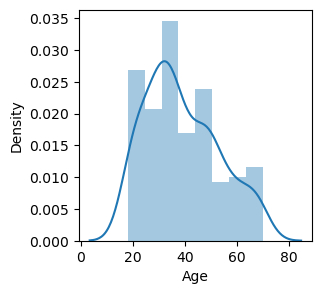

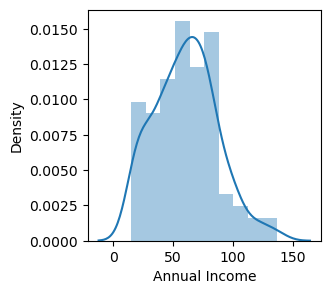

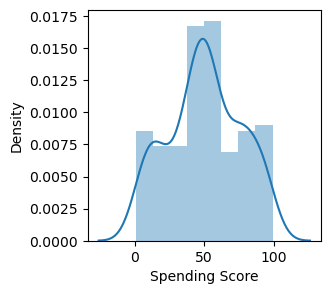

In [247]:
#plotting histogramm of Age , Annual Income , Spending Score
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure(figsize=(3,3))
    sns.distplot(users[i])

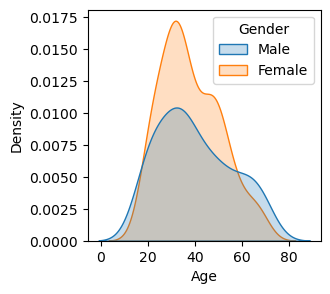

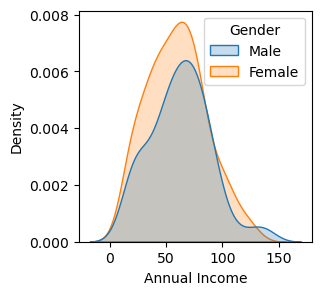

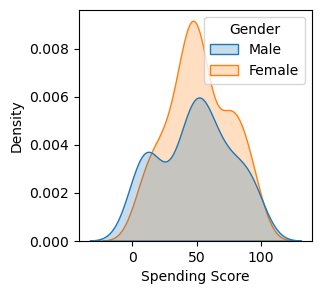

In [248]:
#plotting Male vs Female for Age,Annual Income,Spending Score
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure(figsize=(3,3))
    sns.kdeplot(x=users[i],shade = True, hue = users['Gender'])

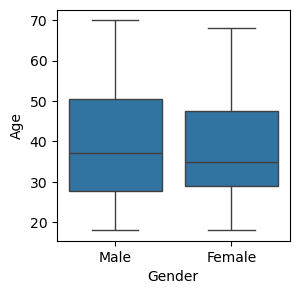

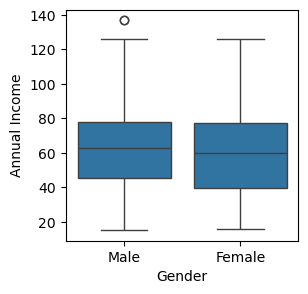

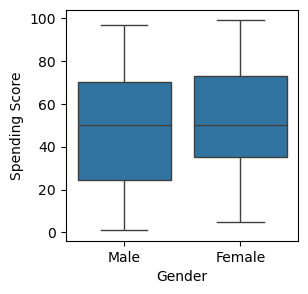

In [249]:
#boxplot  Male vs Female for Age,Annual Income,Spending Score
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=users,x='Gender',y=users[i])

In [250]:
#From the previous plots we see we have more Female than Male customers
users['Gender'].value_counts(normalize=True)
#We find out that 56% of dataset are Female customers and 44% are Male

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

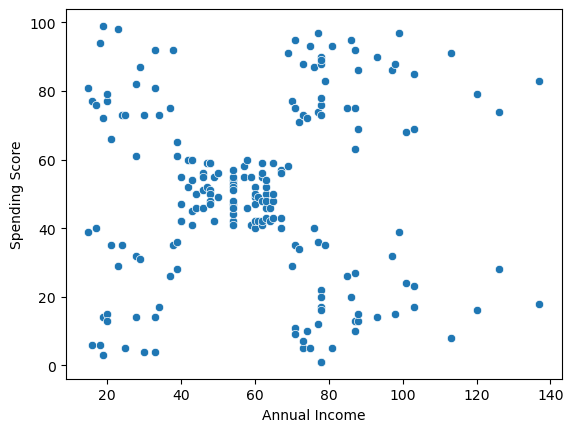

In [251]:
sns.scatterplot(data=users,x='Annual Income', y='Spending Score')

From scatterplot we can observe that we may have 5 clusters

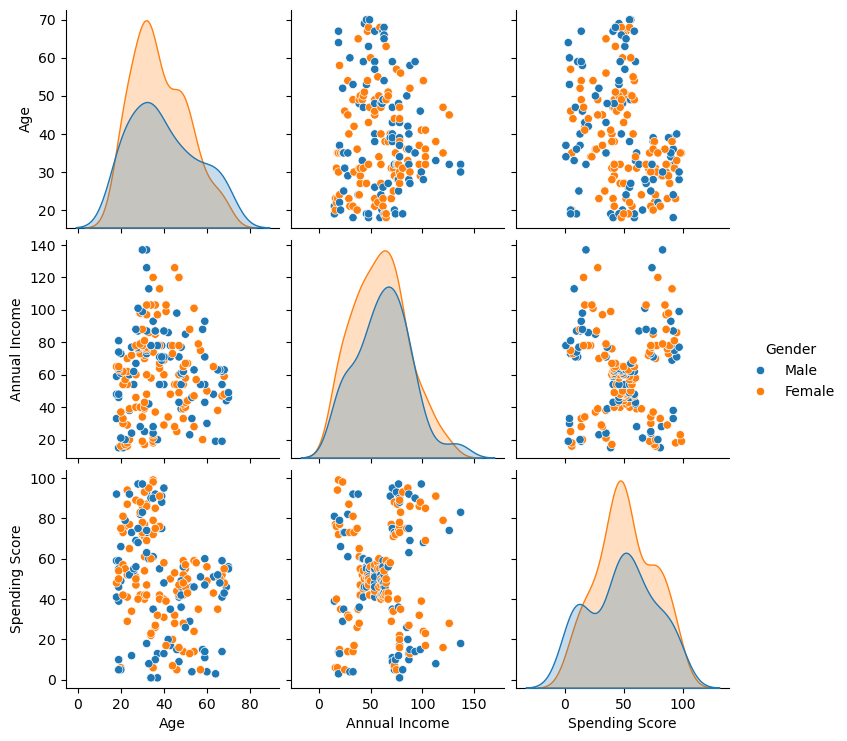

In [252]:
sns.pairplot(users,hue='Gender')

In [253]:
#group the data by Gender and show the mean Age,Annual Income,Spending Score
users.groupby(['Gender'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [254]:
#find any correlations
users.corr(numeric_only=True)

,Age,Annual Income,Spending Score
Age,1.000000,-0.012398,-0.327227
Annual Income,-0.012398,1.000000,0.009903
Spending Score,-0.327227,0.009903,1.000000


<Axes: >

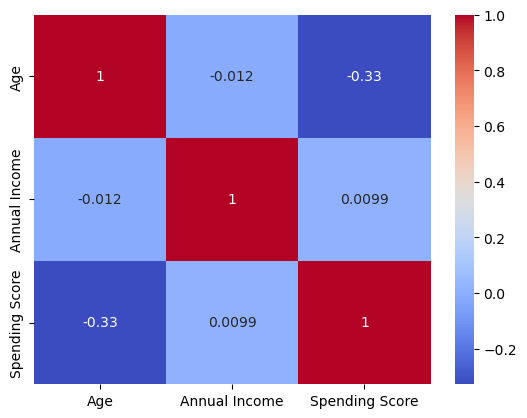

In [255]:
corr_matrix = users.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Clustering - Univariate,Bivariate

## Univariate

### Create clusters based on Annual Income

In [256]:
#lets find the best inertia score 
inertia_scores=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(users[['Annual Income']])
    inertia_scores.append(kmeans.inertia_)

In [257]:
inertia_scores # shows how well the dataset was clustered by Kmeans

[137277.28,
 48660.88888888889,
 25341.285871863223,
 13844.222098218703,
 9134.5081159644,
 5081.484660267268,
 3931.988095238095,
 2916.757936507937,
 2295.976797385621,
 1737.1612554112553]

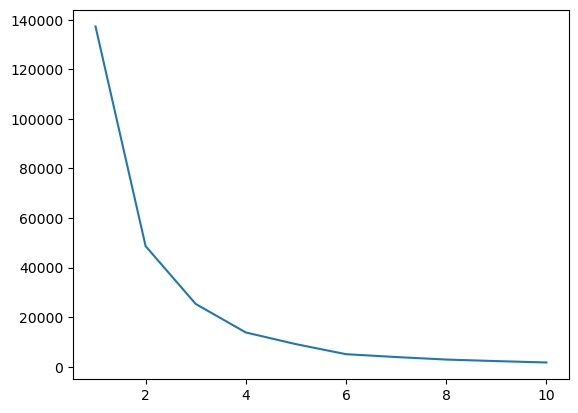

In [258]:
plt.plot(range(1,11),inertia_scores)

We can see that the 'Elbow' in the graph starts at Number of Clusters 3 .So 3 clusters may be the most optimal

In [259]:
clustering1 = KMeans(n_clusters=3,random_state=42)

In [260]:
clustering_annual_income = clustering1.fit(users[['Annual Income']])

In [261]:
users['Income Cluster'] = clustering_annual_income.labels_
users.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [262]:
users['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [263]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Income Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


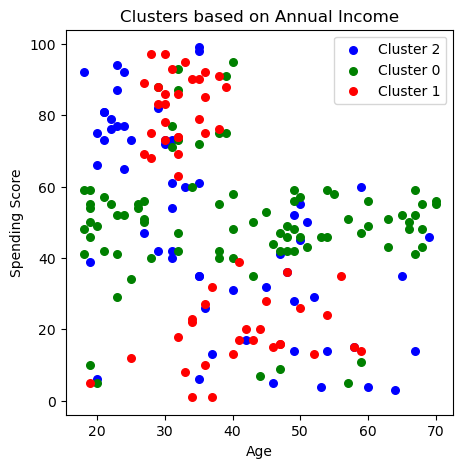

In [264]:

# Plotting the clusters
plt.figure(figsize=(5, 5))
clusters = users['Income Cluster'].unique()
colors = ['b', 'g', 'r']
for cluster, color in zip(clusters, colors):
    cluster_data = users[users['Income Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score'], c=color, label=f'Cluster {cluster}', s=30)
plt.title('Clusters based on Annual Income')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Create clusters based on Spending Score

In [265]:
#lets find the best inertia score 
inertia_scores_sp_score=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(users[['Spending Score']])
    inertia_scores_sp_score.append(kmeans.inertia_)

In [266]:
inertia_scores_sp_score # shows how well the dataset was clustered by Kmeans

[132704.0,
 46936.47916666667,
 13894.87486581457,
 9770.00396864168,
 5144.980746254939,
 3950.161628750338,
 2604.1463733929077,
 2150.8346210899936,
 1860.3274302161399,
 1471.7222345247344]

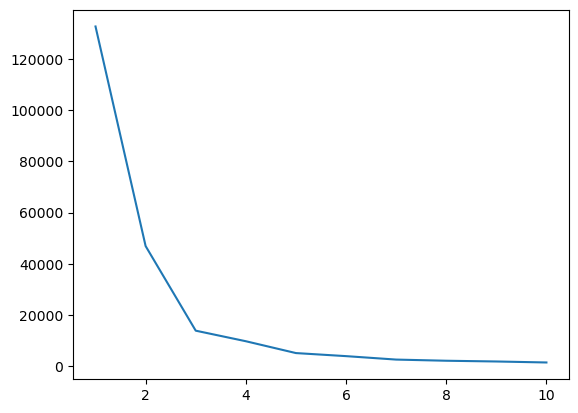

In [267]:
plt.plot(range(1,11),inertia_scores_sp_score)

We can see that the 'Elbow' in the graph starts at Number of Clusters 3 .So 3 clusters may be the most optimal

In [268]:
clustering1 = KMeans(n_clusters=3)

In [269]:
clustering_spending_score = clustering1.fit(users[['Spending Score']])

In [270]:
users['Spending Cluster'] = clustering_spending_score.labels_
users.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending Cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,0
2,Female,20,16,6,2,1
3,Female,23,16,77,2,0
4,Female,31,17,40,2,2


In [271]:
users['Spending Cluster'].value_counts()

Spending Cluster
2    93
0    58
1    49
Name: count, dtype: int64

In [272]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Spending Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Spending Cluster,,,
0,30.000000,65.293103,82.068966
1,42.877551,67.000000,15.306122
2,42.247312,54.215054,48.709677


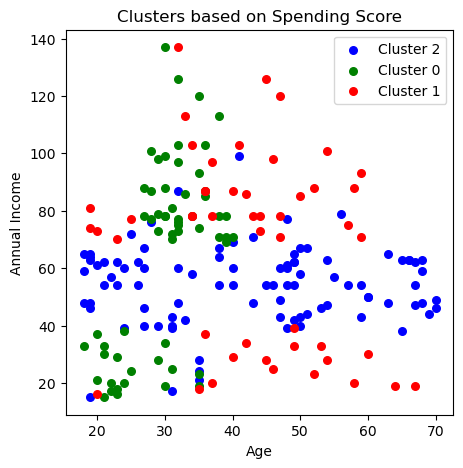

In [273]:

# Plotting the clusters
plt.figure(figsize=(5, 5))
clusters = users['Spending Cluster'].unique()
colors = ['b', 'g', 'r']
for cluster, color in zip(clusters, colors):
    cluster_data = users[users['Spending Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income'], c=color, label=f'Cluster {cluster}', s=30)
plt.title('Clusters based on Spending Score')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

### Create clusters based on Age

In [274]:
#lets find the best inertia score 
inertia_scores_age=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(users[['Age']])
    inertia_scores_age.append(kmeans.inertia_)

In [275]:
inertia_scores_age # shows how well the dataset was clustered by Kmeans

[38831.50000000001,
 10557.505791505791,
 5685.520687645688,
 2534.1262305206155,
 1622.4949413764293,
 1023.7169394073418,
 818.5541831251555,
 649.3676407611073,
 463.5767325684055,
 407.95544096426454]

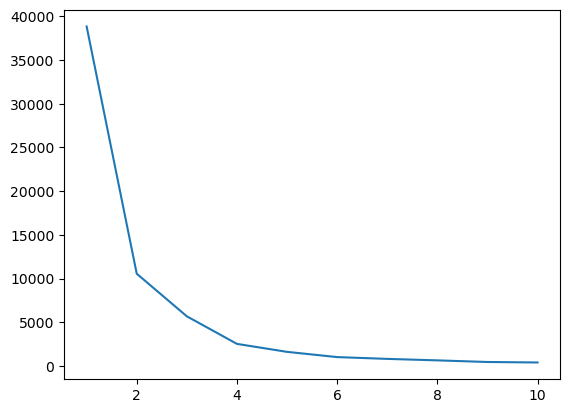

In [276]:
plt.plot(range(1,11),inertia_scores_age)

We can see that the 'Elbow' in the graph starts at Number of Clusters 4 .So 4 clusters may be the most optimal

In [277]:
clustering1 = KMeans(n_clusters=4)

In [278]:
clustering_age = clustering1.fit(users[['Age']])

In [279]:
users['Age Cluster'] = clustering_age.labels_
users.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending Cluster,Age Cluster
0,Male,19,15,39,2,2,0
1,Male,21,15,81,2,0,0
2,Female,20,16,6,2,1,0
3,Female,23,16,77,2,0,0
4,Female,31,17,40,2,2,2


In [280]:
users['Age Cluster'].value_counts()

Age Cluster
2    76
1    49
0    46
3    29
Name: count, dtype: int64

In [281]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Age Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Age Cluster,,,
0,22.130435,48.500000,55.630435
1,48.040816,61.510204,34.551020
2,33.723684,69.868421,61.513158
3,63.275862,53.689655,38.379310


In [282]:
users.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending Cluster,Age Cluster
0,Male,19,15,39,2,2,0
1,Male,21,15,81,2,0,0
2,Female,20,16,6,2,1,0
3,Female,23,16,77,2,0,0
4,Female,31,17,40,2,2,2


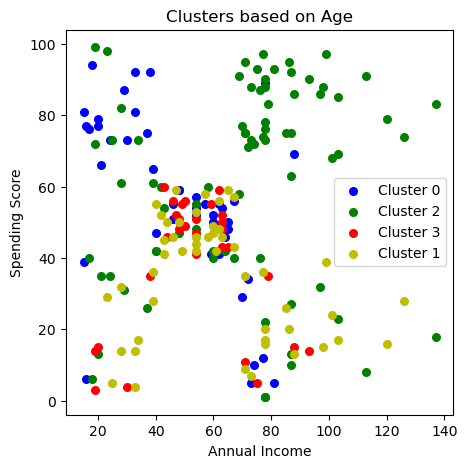

In [283]:
# Plotting the clusters
plt.figure(figsize=(5, 5))
clusters = users['Age Cluster'].unique()
colors = ['b', 'g', 'r','y']
for cluster, color in zip(clusters, colors):
    cluster_data = users[users['Age Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], c=color, label=f'Cluster {cluster}', s=30)
plt.title('Clusters based on Age')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Bivariate Clustering

### Create clusters based on Annual Income + Spending Score

In [284]:
#lets find the best inertia score 
inertia_scores_inc_score=[]
for i in range(1,11):
    kmeans2 =KMeans(n_clusters=i)
    kmeans2.fit(users[['Annual Income','Spending Score']])
    inertia_scores_inc_score.append(kmeans2.inertia_)

In [285]:
inertia_scores_inc_score

[269981.27999999997,
 183069.17582751287,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 37455.984555160285,
 31676.36973205366,
 28083.3739350022,
 26885.67798238583,
 20118.01823471717]

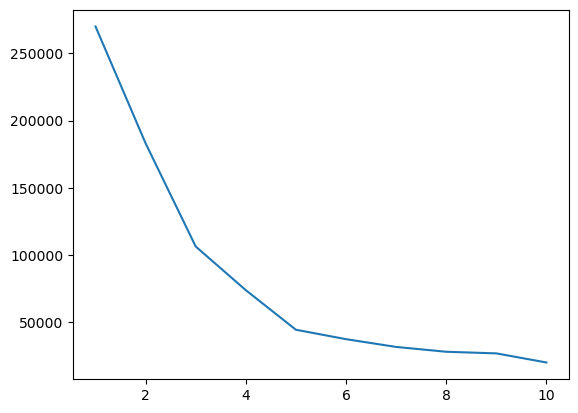

In [286]:
plt.plot(range(1,11),inertia_scores_inc_score)

We can see that the 'Elbow' in the graph starts at Number of Clusters 5 .So 5 clusters may be the most optimal

In [287]:
clustering_inc_score = KMeans(n_clusters=5)

In [288]:
clustering_inc_score.fit(users[['Annual Income','Spending Score']])

KMeans(n_clusters=5)

In [289]:
users['Spending and Income Cluster'] = clustering_inc_score.labels_


In [290]:
users['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
0    81
1    39
2    35
4    23
3    22
Name: count, dtype: int64

In [291]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [292]:
#find the centers of each cluster
centers = pd.DataFrame(clustering_inc_score.cluster_centers_)
centers.columns = ['x','y']

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=users, x= 'Annual Income', y= 'Spending Score',hue='Spending and Income Cluster',palette='tab10')

### Create clusters based on Annual Income + Age

In [300]:
#lets find the best inertia score 
inertia_scores_inc_age=[]
for i in range(1,11):
    kmeans2 =KMeans(n_clusters=i)
    kmeans2.fit(users[['Annual Income','Age']])
    inertia_scores_inc_age.append(kmeans2.inertia_)

In [301]:
inertia_scores_inc_age

[176108.77999999997,
 87179.72383252818,
 59525.85757379874,
 39529.88796736351,
 32620.945198551453,
 25399.02200441699,
 21873.211057947894,
 19480.630799755796,
 16737.771403145547,
 15774.944696599221]

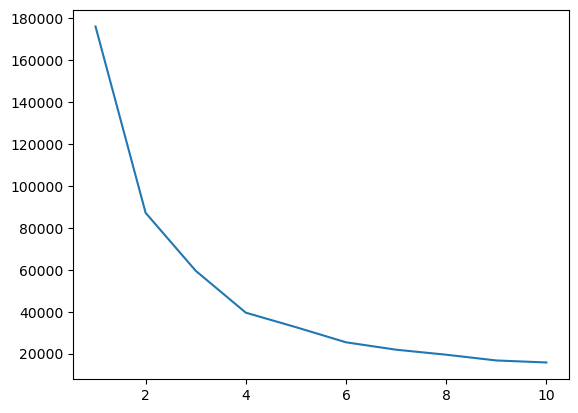

In [302]:
plt.plot(range(1,11),inertia_scores_inc_age)

We can see that the 'Elbow' in the graph starts at Number of Clusters 4.So 4 clusters may be the most optimal

In [303]:
clustering_inc_age = KMeans(n_clusters=4)

In [304]:
clustering_inc_age.fit(users[['Annual Income','Age']])

KMeans(n_clusters=4)

In [305]:
users['Age and Income Cluster'] = clustering_inc_age.labels_


In [306]:
users['Age and Income Cluster'].value_counts()

Age and Income Cluster
2    61
1    53
3    50
0    36
Name: count, dtype: int64

In [307]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Age and Income Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Age and Income Cluster,,,
0,37.833333,99.888889,50.638889
1,56.000000,52.867925,44.490566
2,30.967213,69.852459,52.065574
3,31.020000,29.060000,53.660000


In [308]:
#find the centers of each cluster
centers = pd.DataFrame(clustering_inc_age.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income', ylabel='Age'>

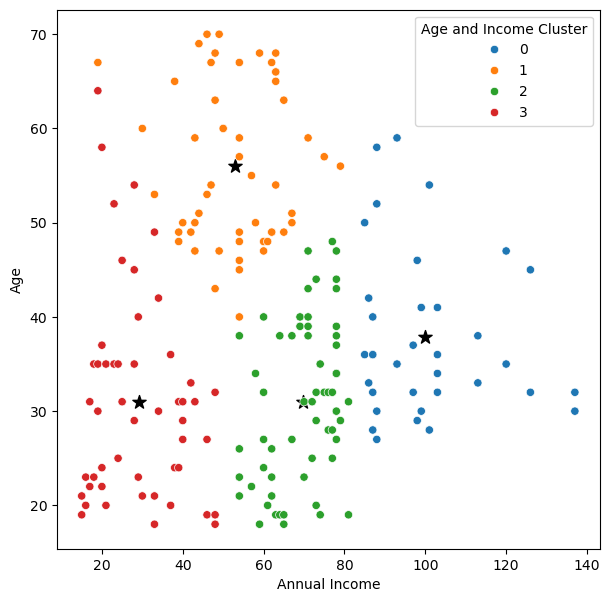

In [309]:
plt.figure(figsize=(7,7))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=users, x= 'Annual Income', y= 'Age',hue='Age and Income Cluster',palette='tab10')

### Create clusters based on Age + Spending Score

In [310]:
#lets find the best inertia score 
inertia_scores_score_age=[]
for i in range(1,11):
    kmeans2 =KMeans(n_clusters=i)
    kmeans2.fit(users[['Annual Income','Age']])
    inertia_scores_score_age.append(kmeans2.inertia_)

In [311]:
inertia_scores_score_age

[176108.77999999997,
 87189.04625974289,
 63120.43491305989,
 39529.88796736351,
 33115.9440925088,
 25460.547371910277,
 22434.36902025804,
 20158.357328492282,
 16486.89254721027,
 14602.440701759468]

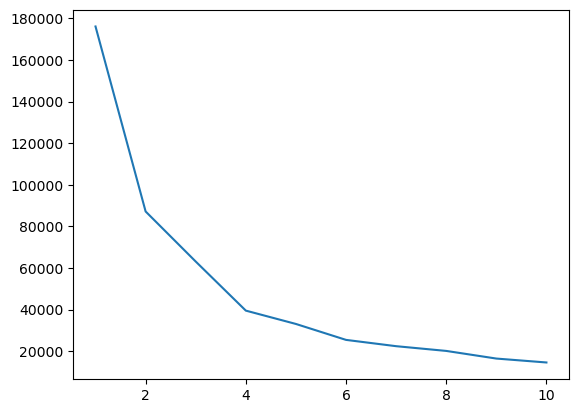

In [312]:
plt.plot(range(1,11),inertia_scores_score_age)

We can see that the 'Elbow' in the graph starts at Number of Clusters 4 .So 4 clusters may be the most optimal

In [313]:
inertia_scores_score_age = KMeans(n_clusters=4)

In [314]:
inertia_scores_score_age.fit(users[['Spending Score','Age']])

KMeans(n_clusters=4)

In [315]:
users['Age and Spending Cluster'] = inertia_scores_score_age.labels_

In [316]:
users['Age and Spending Cluster'].value_counts()

Age and Spending Cluster
3    57
2    49
0    48
1    46
Name: count, dtype: int64

In [317]:
#group the data by Clusters and show the mean Age,Annual Income,Spending Score
users.groupby(['Age and Spending Cluster'])[['Age', 'Annual Income', 'Spending Score']].mean()

,Age,Annual Income,Spending Score
Age and Spending Cluster,,,
0,43.291667,66.937500,15.020833
1,27.326087,52.282609,49.369565
2,55.408163,55.673469,48.040816
3,30.175439,66.070175,82.350877


In [318]:
#find the centers of each cluster
centers = pd.DataFrame(inertia_scores_score_age.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Spending Score', ylabel='Age'>

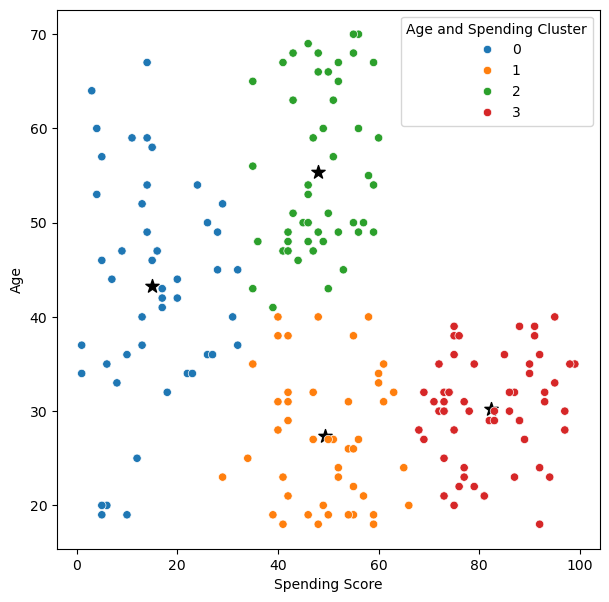

In [319]:
plt.figure(figsize=(7,7))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=users, x= 'Spending Score', y= 'Age',hue='Age and Spending Cluster',palette='tab10')